In [37]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [42]:
#get data
def get_data(dir):
    images = []
    labels = []
    dir_list = os.listdir(dir)
    print(f"dir_list: {dir_list}")
    for index, letter_dir in enumerate(dir_list):
        print("Getting images of", letter_dir)
        for file in os.listdir(dir + '/' + letter_dir):
            filepath = dir + '/' + letter_dir + '/' + file
            image = cv2.resize(cv2.imread(filepath), (32, 32))
            #image = cv2.imread(filepath)
            images.append(image)
            labels.append(index)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [63]:
img_cap_dir = "./image_capture/"
X, y = get_data(img_cap_dir)

dir_list: ['A', 'B', 'C']
Getting images of A
Getting images of B
Getting images of C


In [64]:
print("X shape:", X.shape)
print("y length:", len(y))

X shape: (5, 32, 32, 3)
y length: 5


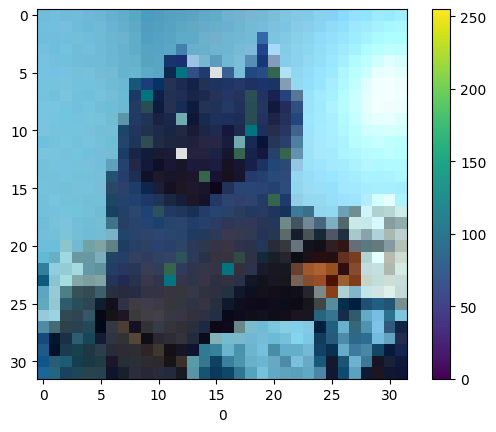

In [65]:
plt.Figure()
plt.imshow(X[0])
plt.colorbar()
plt.xlabel(y[0])
plt.show()

In [46]:
#preprocess data
def preprocess_data(X, y):
    # normalize the rgb values, our filter should have 3 channels, red, green, blue. that has a range of 0-255
    # if we want to feed it in to the neural network we should noramlize it to a value between 0-1 by dividing by 255
    normalized_X = X/255.0
    # normalized_X = X.astype('float32')/255.0
    # our input set is encoded as the following (labels) A, B, C = 0, 1, 2
    # however keras doesn't accept this encoding so we must convert our array of labels y into a 2d array 
    # where each column in a row corresponds to an int, and if the label corresponds to that int a 1 will go in that column, 0 if not
    # this is called hot encoding
    label_encoded_y = tf.keras.utils.to_categorical(y)
    #label_encoded_y = y
    
    #split X and y further into train and testing sets
    #X_train, X_test, y_train, y_test = model_selection.train_test_split(normalized_X, label_encoded_y, test_size=0.2)
    return normalized_X, label_encoded_y

In [66]:
normalized_X, label_encoded_y = preprocess_data(X, y)
print("X_train:",normalized_X.shape)
print("y_train[0]:",label_encoded_y[0])
print("y_train length:", len(label_encoded_y))

X_train: (5, 32, 32, 3)
y_train[0]: [1. 0. 0.]
y_train length: 5


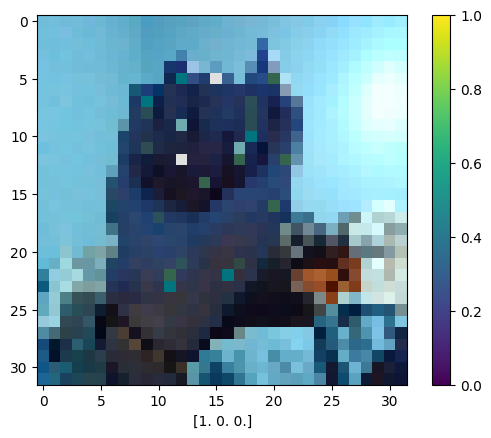

<class 'numpy.ndarray'>


In [67]:
plt.Figure()
plt.imshow(normalized_X[0])
plt.colorbar()
plt.xlabel(label_encoded_y[0])
plt.show()
print(type(normalized_X[0]))

In [53]:
from tensorflow.keras import models

model = models.load_model("./model.h1")
model.compile(optimizer='adam',
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])


In [25]:
#evaluate accuracy
test_loss, test_acc = model.evaluate(normalized_X, label_encoded_y, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

AttributeError: '_UserObject' object has no attribute 'evaluate'

In [70]:
print(type(model))
input_data = np.expand_dims(normalized_X[0], axis=0)

# Now, input_data has shape (1, 32, 32, 3)
predictions = model.predict(input_data)
print(predictions)
predicted_class = np.argmax(predictions)
pc = np.array(predicted_class)
print(pc)
    


<class 'keras.src.engine.sequential.Sequential'>
1/1 [==============================] - 0s 24ms/step
[[ -51.04438     -2.973818   -19.697186   -18.051428   -26.867031
     5.627953     2.923156    15.0420885  -21.722807    -1.2524465
   -53.583088   -12.935023     7.979122   -10.550141   -18.70433
  -106.313034   -22.161343   -21.3953     -29.455463   -21.054918
   -36.49122    -45.370476    13.237475   -31.22144    -27.516575
   -39.456005   -16.296408   -32.019337   -39.582943 ]]
7


In [57]:
# Assuming logits is your model's output
logits = np.array([[-4.5831272e+01, -1.5263453e+01, 6.4631820e-02, 1.0432237e+00,
                    -2.2343815e+01, 3.8430147e+00, -2.1585276e+00, 4.0658822e+00,
                    -1.9649923e+01, -4.0473404e+00, -4.1017773e+01, -1.3331966e+01,
                    1.6699728e+01, -2.7591534e+01, -2.7362585e+01, -7.8948616e+01,
                    -1.1407731e+01, -7.3360057e+00, -5.7679014e+00, -8.4129289e-02,
                    -2.1627775e+01, -2.9229008e+01, 1.7834600e+00, -2.9508179e+01,
                    -1.7045183e+01, -4.8471085e+01, -7.4927073e+00, -1.8461906e+01,
                    -3.3322090e+01]])

# Apply softmax to convert logits to probabilities
probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

# Get the index of the class with the highest probability
predicted_class = np.argmax(probabilities)

print("Predicted Class:", predicted_class)
print("Probabilities:", probabilities)

Predicted Class: 12
Probabilities: [[6.96833368e-28 1.31390527e-14 5.96302609e-08 1.58658653e-07
  1.10560987e-17 2.60854027e-06 6.45596015e-09 3.25977534e-06
  1.63510007e-16 9.76472158e-10 8.58232572e-26 9.06563439e-14
  9.99993522e-01 5.81495694e-20 7.31101695e-20 2.88701596e-42
  6.20987477e-13 3.64259320e-11 1.74755043e-10 5.13878657e-08
  2.26242467e-17 1.13083849e-20 3.32616894e-07 8.55378157e-21
  2.21191558e-15 4.97362136e-29 3.11426835e-11 5.36405924e-16
  1.88711190e-22]]
